In [66]:
import torch
import numpy as np
import os
from PIL import Image
from torchvision import datasets
import matplotlib.pyplot as plt
import shutil
import random
from torchvision import transforms
from torch.utils.data import Dataset, random_split, DataLoader
import torch.nn as nn
import torch.optim as optim
import torch.nn as nn 
import torch.optim as optim
from torchvision import models
import copy
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

In [26]:
raw_data = datasets.ImageFolder('/Users/macintosh/Desktop/Cervical Cancer Classification/archive (4)')
raw_data

Dataset ImageFolder
    Number of datapoints: 5015
    Root location: /Users/macintosh/Desktop/Cervical Cancer Classification/archive (4)

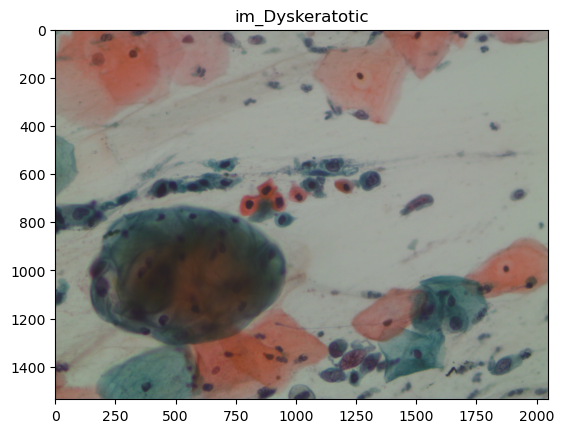

In [27]:
image, label = raw_data[0]
plt.imshow(image)
plt.title(raw_data.classes[label])
plt.show()

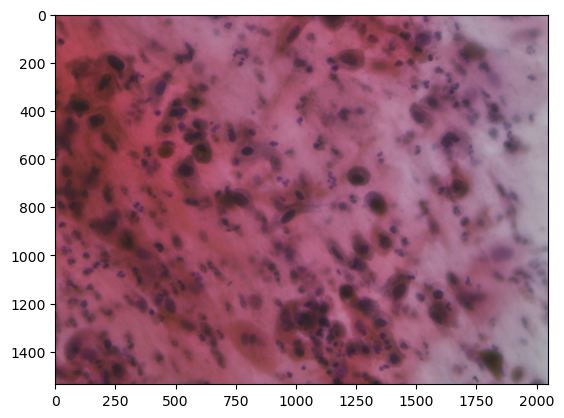

In [28]:
bmp_file_path = '/Users/macintosh/Desktop/Cervical Cancer Classification/archive (4)/im_Dyskeratotic/im_Dyskeratotic/220.bmp'
image = Image.open(bmp_file_path)
plt.imshow(image)

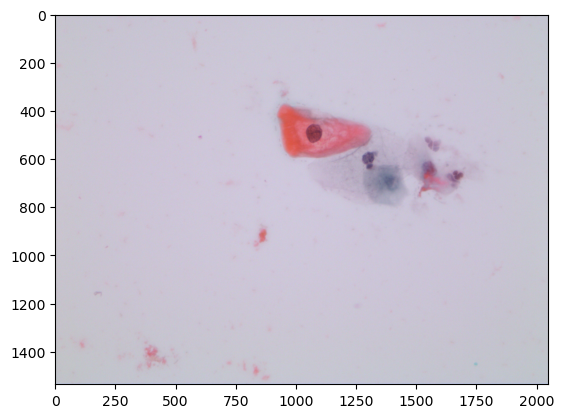

In [29]:
bmp_file_path = '/Users/macintosh/Desktop/Cervical Cancer Classification/archive (4)/im_Koilocytotic/im_Koilocytotic/001.bmp'
image = Image.open(bmp_file_path)
plt.imshow(image)

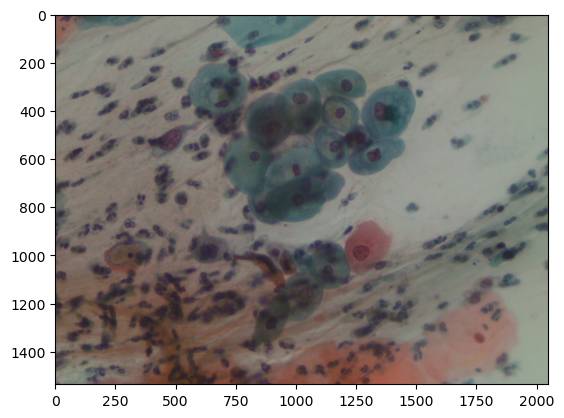

In [30]:
bmp_file_path = '/Users/macintosh/Desktop/Cervical Cancer Classification/archive (4)/im_Metaplastic/im_Metaplastic/001.bmp'
image = Image.open(bmp_file_path)
plt.imshow(image)

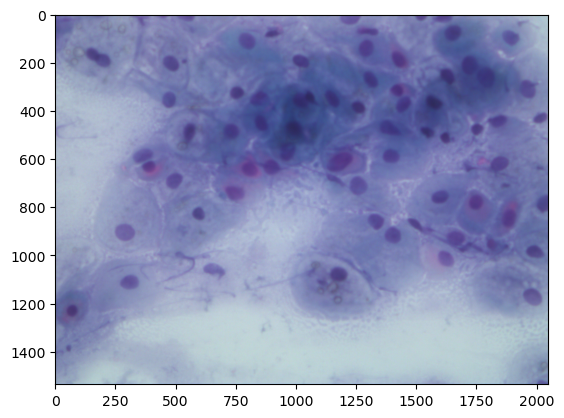

In [31]:
bmp_file_path = '/Users/macintosh/Desktop/Cervical Cancer Classification/archive (4)/im_Parabasal/im_Parabasal/001.bmp'
image = Image.open(bmp_file_path)
plt.imshow(image)

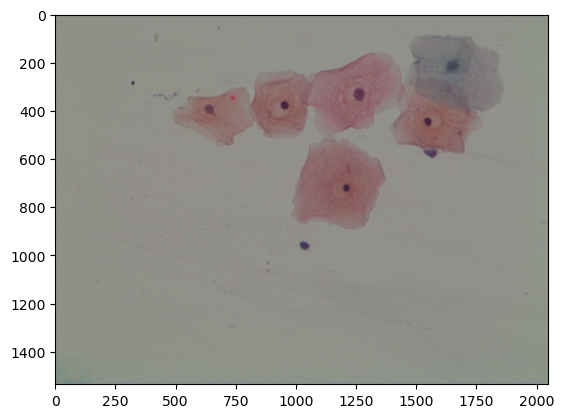

In [32]:
bmp_file_path = '/Users/macintosh/Desktop/Cervical Cancer Classification/archive (4)/im_Superficial-Intermediate/im_Superficial-Intermediate/001.bmp'
image = Image.open(bmp_file_path)
plt.imshow(image)

In [33]:
def extract_bmp(input_dir, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        
    for filename in os.listdir(input_dir):
        if filename.endswith('.bmp'):
           file_path = os.path.join(input_dir, filename)
           
           shutil.move(file_path, output_dir)

In [34]:
extract_bmp('/Users/macintosh/Desktop/Cervical Cancer Classification/archive (4)/im_Dyskeratotic/im_Dyskeratotic',
            '/Users/macintosh/Desktop/Cervical Cancer Classification/main_im_Dyskeratotic')

extract_bmp('/Users/macintosh/Desktop/Cervical Cancer Classification/archive (4)/im_Koilocytotic/im_Koilocytotic',
            '/Users/macintosh/Desktop/Cervical Cancer Classification/main_im_Koilocytotic')

extract_bmp('/Users/macintosh/Desktop/Cervical Cancer Classification/archive (4)/im_Metaplastic/im_Metaplastic',
            '/Users/macintosh/Desktop/Cervical Cancer Classification/main_im_Metaplastic')

extract_bmp('/Users/macintosh/Desktop/Cervical Cancer Classification/archive (4)/im_Parabasal/im_Parabasal',
            '/Users/macintosh/Desktop/Cervical Cancer Classification/main_im_Parabasal')

extract_bmp('/Users/macintosh/Desktop/Cervical Cancer Classification/archive (4)/im_Superficial-Intermediate/im_Superficial-Intermediate',
            '/Users/macintosh/Desktop/Cervical Cancer Classification/main_im_Superficial-Intermediate')

In [35]:
# # Group normal and abnormal cells into separate folders
# normal_cell = ['im_Superficial-Intermediate', 'im_Metaplastic']
# abnormal_cell = ['im_Dyskeratotic', 'im_Koilocytotic', 'im_Parabasal']

In [36]:
# defining parts for normal and abnormal catgories
normal_dirs = [
    '/Users/macintosh/Desktop/Cervical Cancer Classification/normal_cells/main_im_Superficial-Intermediate',
    '/Users/macintosh/Desktop/Cervical Cancer Classification/normal_cells/main_im_Metaplastic'
]
abnormal_dirs = [
    '/Users/macintosh/Desktop/Cervical Cancer Classification/abnormal_cells/main_im_Dyskeratotic',
    '/Users/macintosh/Desktop/Cervical Cancer Classification/abnormal_cells/main_im_Koilocytotic',
    '/Users/macintosh/Desktop/Cervical Cancer Classification/abnormal_cells/main_im_Parabasal'
]

# Function to label the dataset as normal and abnormal 
def label_dataset(base_dirs, label):
    labeled_images=[]
    for dir in base_dirs:
        for image in os.listdir(dir):
            image_path = os.path.join(dir, image)
            if image.endswith('.bmp'):
                labeled_images.append((image_path, label))
    return labeled_images

# Labelling datasets(normal = 0, abnormal = 1)
normal_images = label_dataset(normal_dirs, 0)
abnormal_images = label_dataset(abnormal_dirs, 1)

# Combining both normal and abnormal datasets
all_images = normal_images + abnormal_images

# Shuffling the dataset
random.shuffle(all_images)

In [37]:
all_images

[('/Users/macintosh/Desktop/Cervical Cancer Classification/abnormal_cells/main_im_Dyskeratotic/160.bmp',
  1),
 ('/Users/macintosh/Desktop/Cervical Cancer Classification/normal_cells/main_im_Superficial-Intermediate/056.bmp',
  0),
 ('/Users/macintosh/Desktop/Cervical Cancer Classification/normal_cells/main_im_Superficial-Intermediate/085.bmp',
  0),
 ('/Users/macintosh/Desktop/Cervical Cancer Classification/abnormal_cells/main_im_Dyskeratotic/052.bmp',
  1),
 ('/Users/macintosh/Desktop/Cervical Cancer Classification/normal_cells/main_im_Metaplastic/156.bmp',
  0),
 ('/Users/macintosh/Desktop/Cervical Cancer Classification/normal_cells/main_im_Metaplastic/161.bmp',
  0),
 ('/Users/macintosh/Desktop/Cervical Cancer Classification/abnormal_cells/main_im_Dyskeratotic/106.bmp',
  1),
 ('/Users/macintosh/Desktop/Cervical Cancer Classification/normal_cells/main_im_Metaplastic/126.bmp',
  0),
 ('/Users/macintosh/Desktop/Cervical Cancer Classification/abnormal_cells/main_im_Parabasal/093.bmp',

- Need to ensure the sizes of the images are the same
- Need to augment by flipping ensuring all images have the same structure
- Need to make the color consistent across all images
- Need to convert all images to tensors
- Need to normalize the numerical variables
- Convolutional neural network (CNN) works better with image datasets
- RNN works better with sequential datasets (time-series)


In [38]:
class imageClass(Dataset):
    def __init__(self, data, transform=None):
        self.data = data
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        image_path, label = self.data[idx]
        image = Image.open(image_path).convert('RGB')
        
        if self.transform:
            image = self.transform(image)
        
        return image, label
    

transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(20),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

dataset = imageClass(all_images, transform=transform)

In [39]:
# Splitting the dataset into training and testing sets
train_size = int(0.7 * len(dataset))
test_size = len(dataset) - train_size
train_set, test_set = torch.utils.data.random_split(dataset, [train_size, test_size])

# For neural network, data loader is used to load the data 
train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
test_loader = DataLoader(test_set, batch_size=32, shuffle=False)

In [40]:
print(len(train_set))
len(test_set)

676


290

In [41]:
class simpleCNN(nn.Module):
    def __init__(self):
        super(simpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.ln1 = nn.Linear(32 * 56 * 56, 128)
        self.ln2 = nn.Linear(128, 2)
        
    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 32 * 56 * 56)
        x = torch.relu(self.ln1(x))
        x = self.ln2(x)
        
        return x
    
model = simpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


# Training the model
def train(model, data_loader, criterion, optimizer, epochs=5):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in data_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(data_loader):.4f}')
        
# Evaluating the model
def evaluate(model, data_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in data_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Accuracy of the model on the images: {100 * correct / total:.2f}%')
    

In [42]:
train(model, train_loader, criterion, optimizer)

Epoch [1/5], Loss: 1.4835
Epoch [2/5], Loss: 0.4676
Epoch [3/5], Loss: 0.4440
Epoch [4/5], Loss: 0.4148
Epoch [5/5], Loss: 0.4074


In [43]:
print(evaluate(model, train_loader))
print(evaluate(model, test_loader))

Accuracy of the model on the images: 80.47%
None
Accuracy of the model on the images: 75.17%
None


### <center> **ResNet50**

In [44]:
# Model Setup
model = models.resnet50(weights='DEFAULT')
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [45]:
# Early Stopping Class
class EarlyStopping:
    def __init__(self, patience=5, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        self.best_model_state = None

    def __call__(self, val_loss, model):
        if self.best_loss is None:
            self.best_loss = val_loss
            self.best_model_state = copy.deepcopy(model.state_dict())
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            print(f"EarlyStopping counter: {self.counter} of {self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.best_model_state = copy.deepcopy(model.state_dict())
            self.counter = 0

In [46]:
# 3. Training Function
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, early_stopping):
    
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        avg_train_loss = running_loss / len(train_loader)
        
        # Validation Phase
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

        avg_val_loss = val_loss / len(val_loader)
        
        print(f"Epoch [{epoch+1}/{num_epochs}], "
              f"Train Loss: {avg_train_loss:.4f}, "
              f"Validation Loss: {avg_val_loss:.4f}")

        scheduler.step()

        # Check for early stopping
        early_stopping(avg_val_loss, model)
        if early_stopping.early_stop:
            print("Stopping early due to no improvement in validation loss.")
            # Load the best model state found so far
            model.load_state_dict(early_stopping.best_model_state)
            break

In [73]:
# Evaluation Function
def evaluate_model(model, data_loader):
    model.eval()
    all_preds=[]
    all_labels=[]
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
    accuracy = 100 * correct / total
    return accuracy

def get_predictions(model, dataloader, device="cpu"):
    model.eval()
    all_labels, all_preds = [], []
    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())
    return all_labels, all_preds

Epoch [1/30], Train Loss: 0.2196, Validation Loss: 0.1732
Epoch [2/30], Train Loss: 0.2433, Validation Loss: 0.2127
EarlyStopping counter: 1 of 5
Epoch [3/30], Train Loss: 0.2336, Validation Loss: 0.1755
EarlyStopping counter: 2 of 5
Epoch [4/30], Train Loss: 0.2122, Validation Loss: 0.1943
EarlyStopping counter: 3 of 5
Epoch [5/30], Train Loss: 0.2497, Validation Loss: 0.2321
EarlyStopping counter: 4 of 5
Epoch [6/30], Train Loss: 0.2298, Validation Loss: 0.2247
EarlyStopping counter: 5 of 5
Stopping early due to no improvement in validation loss.
Training Accuracy: 92.01%
Testing Accuracy: 91.03%
F1 Score: 0.9170
Precision: 0.9172
Recall: 0.9172


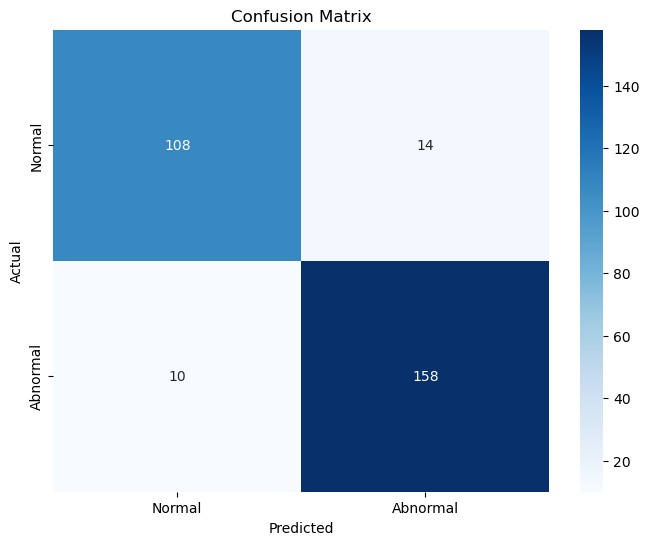

In [74]:
# Execution
if __name__ == '__main__':
    early_stopping = EarlyStopping(patience=5, min_delta=0.01)
    
    train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs=30, early_stopping=early_stopping)
    train_accuracy = evaluate_model(model, train_loader)
    test_accuracy = evaluate_model(model, test_loader)
    print(f'Training Accuracy: {train_accuracy:.2f}%')
    print(f'Testing Accuracy: {test_accuracy:.2f}%')
    
    model_path = "/Users/macintosh/Desktop/Cervical Cancer Classification/Models/model.pth"
    torch.save(model, model_path)
    
    all_labels, all_preds = get_predictions(model, test_loader)
    f1 = f1_score(all_labels, all_preds, average='weighted')
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    cm = confusion_matrix(all_labels, all_preds)
    print(f'F1 Score: {f1:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Normal', 'Abnormal'],
                yticklabels=['Normal', 'Abnormal'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

### <center> **Alex Net**

In [82]:
# Model Setup
model_alex = models.alexnet(weights='AlexNet_Weights.IMAGENET1K_V1')
num_ftrs = model_alex.classifier[6].in_features
model_alex.classifier[6] = nn.Linear(num_ftrs, 2)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_alex = model_alex.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_alex.parameters(), lr=0.001)

In [83]:
# Early Stopping Class
class EarlyStopping:
    def __init__(self, patience=5, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        self.best_model_state = None

    def __call__(self, val_loss, model_alex):
        if self.best_loss is None:
            self.best_loss = val_loss
            self.best_model_state = copy.deepcopy(model_alex.state_dict())
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            print(f"EarlyStopping counter: {self.counter} of {self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.best_model_state = copy.deepcopy(model_alex.state_dict())
            self.counter = 0

In [84]:
# 3. Training Function
def train_model(model_alex, train_loader, val_loader, criterion, optimizer, num_epochs, early_stopping):
    
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)
    
    for epoch in range(num_epochs):
        model_alex.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model_alex(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        avg_train_loss = running_loss / len(train_loader)
        
        # Validation Phase
        model_alex.eval()
        val_loss = 0.0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model_alex(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

        avg_val_loss = val_loss / len(val_loader)
        
        print(f"Epoch [{epoch+1}/{num_epochs}], "
              f"Train Loss: {avg_train_loss:.4f}, "
              f"Validation Loss: {avg_val_loss:.4f}")

        scheduler.step()

        # Check for early stopping
        early_stopping(avg_val_loss, model_alex)
        if early_stopping.early_stop:
            print("Stopping early due to no improvement in validation loss.")
            # Load the best model state found so far
            model_alex.load_state_dict(early_stopping.best_model_state)
            break

In [85]:
# Evaluation Function
def evaluate_model(model_alex, data_loader):
    model_alex.eval()
    all_preds=[]
    all_labels=[]
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model_alex(images)
            _, predicted = torch.max(outputs.data, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
    accuracy = 100 * correct / total
    return accuracy

def get_predictions(model_alex, dataloader, device="cpu"):
    model_alex.eval()
    all_labels, all_preds = [], []
    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model_alex(images)
            _, preds = torch.max(outputs, 1)
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())
    return all_labels, all_preds

Epoch [1/30], Train Loss: 1.0559, Validation Loss: 0.6955
Epoch [2/30], Train Loss: 0.7079, Validation Loss: 0.6859
EarlyStopping counter: 1 of 5
Epoch [3/30], Train Loss: 0.6868, Validation Loss: 0.6820
Epoch [4/30], Train Loss: 0.7010, Validation Loss: 0.6830
EarlyStopping counter: 1 of 5
Epoch [5/30], Train Loss: 0.6798, Validation Loss: 0.6837
EarlyStopping counter: 2 of 5
Epoch [6/30], Train Loss: 0.6785, Validation Loss: 0.6829
EarlyStopping counter: 3 of 5
Epoch [7/30], Train Loss: 0.6742, Validation Loss: 0.6838
EarlyStopping counter: 4 of 5
Epoch [8/30], Train Loss: 0.6783, Validation Loss: 0.6838
EarlyStopping counter: 5 of 5
Stopping early due to no improvement in validation loss.
Training Accuracy: 59.32%
Testing Accuracy: 58.28%
F1 Score: 0.4250
Precision: 0.3356
Recall: 0.5793


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


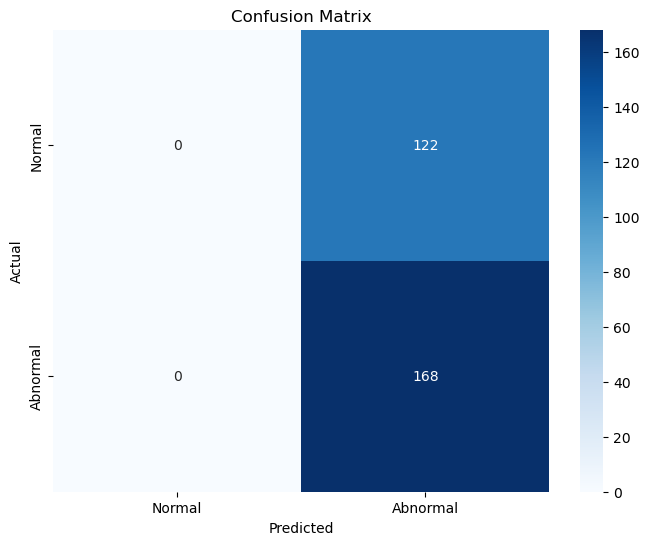

In [86]:
# Execution
if __name__ == '__main__':
    early_stopping = EarlyStopping(patience=5, min_delta=0.01)
    
    train_model(model_alex, train_loader, test_loader, criterion, optimizer, num_epochs=30, early_stopping=early_stopping)
    train_accuracy = evaluate_model(model_alex, train_loader)
    test_accuracy = evaluate_model(model_alex, test_loader)
    print(f'Training Accuracy: {train_accuracy:.2f}%')
    print(f'Testing Accuracy: {test_accuracy:.2f}%')
    
    model_path = "/Users/macintosh/Desktop/Cervical Cancer Classification/Models/model_alex.pth"
    torch.save(model_alex, model_path)
    
    all_labels, all_preds = get_predictions(model_alex, test_loader)
    f1 = f1_score(all_labels, all_preds, average='weighted')
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    cm = confusion_matrix(all_labels, all_preds)
    print(f'F1 Score: {f1:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Normal', 'Abnormal'],
                yticklabels=['Normal', 'Abnormal'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

### <center> **Efficient Net**

In [54]:
# Model Setup
model_eff = models.efficientnet_b3(weights='DEFAULT')
num_ftrs = model_eff.classifier[1].in_features
model_eff.classifier[1] = nn.Linear(num_ftrs, 2)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_eff = model_eff.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_eff.parameters(), lr=0.001)

In [55]:
# Early Stopping Class
class EarlyStopping:
    def __init__(self, patience=5, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        self.best_model_state = None

    def __call__(self, val_loss, model_eff):
        if self.best_loss is None:
            self.best_loss = val_loss
            self.best_model_state = copy.deepcopy(model_eff.state_dict())
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            print(f"EarlyStopping counter: {self.counter} of {self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.best_model_state = copy.deepcopy(model_eff.state_dict())
            self.counter = 0

In [56]:
# 3. Training Function
def train_model(model_eff, train_loader, val_loader, criterion, optimizer, num_epochs, early_stopping):
    
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)
    
    for epoch in range(num_epochs):
        model_eff.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model_eff(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        avg_train_loss = running_loss / len(train_loader)
        
        # Validation Phase
        model_eff.eval()
        val_loss = 0.0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model_eff(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

        avg_val_loss = val_loss / len(val_loader)
        
        print(f"Epoch [{epoch+1}/{num_epochs}], "
              f"Train Loss: {avg_train_loss:.4f}, "
              f"Validation Loss: {avg_val_loss:.4f}")

        scheduler.step()

        # Check for early stopping
        early_stopping(avg_val_loss, model_eff)
        if early_stopping.early_stop:
            print("Stopping early due to no improvement in validation loss.")
            # Load the best model state found so far
            model_eff.load_state_dict(early_stopping.best_model_state)
            break

In [78]:
# Evaluation Function
def evaluate_model(model_eff, data_loader):
    model_eff.eval()
    all_preds=[]
    all_labels=[]
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model_eff(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
    accuracy = 100 * correct / total
    return accuracy

def get_predictions(model_eff, dataloader, device="cpu"):
    model_eff.eval()
    all_labels, all_preds = [], []
    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model_eff(images)
            _, preds = torch.max(outputs, 1)
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())
    return all_labels, all_preds

Epoch [1/30], Train Loss: 0.2324, Validation Loss: 0.1782
Epoch [2/30], Train Loss: 0.2220, Validation Loss: 0.1801
EarlyStopping counter: 1 of 5
Epoch [3/30], Train Loss: 0.2928, Validation Loss: 0.2067
EarlyStopping counter: 2 of 5
Epoch [4/30], Train Loss: 0.1682, Validation Loss: 0.1643
Epoch [5/30], Train Loss: 0.2315, Validation Loss: 0.1552
EarlyStopping counter: 1 of 5
Epoch [6/30], Train Loss: 0.1686, Validation Loss: 0.1485
Epoch [7/30], Train Loss: 0.2026, Validation Loss: 0.1778
EarlyStopping counter: 1 of 5
Epoch [8/30], Train Loss: 0.2645, Validation Loss: 0.1519
EarlyStopping counter: 2 of 5
Epoch [9/30], Train Loss: 0.2546, Validation Loss: 0.1848
EarlyStopping counter: 3 of 5
Epoch [10/30], Train Loss: 0.1950, Validation Loss: 0.1765
EarlyStopping counter: 4 of 5
Epoch [11/30], Train Loss: 0.1977, Validation Loss: 0.1694
EarlyStopping counter: 5 of 5
Stopping early due to no improvement in validation loss.
Training Accuracy: 94.67%
Testing Accuracy: 92.76%
F1 Score: 0.

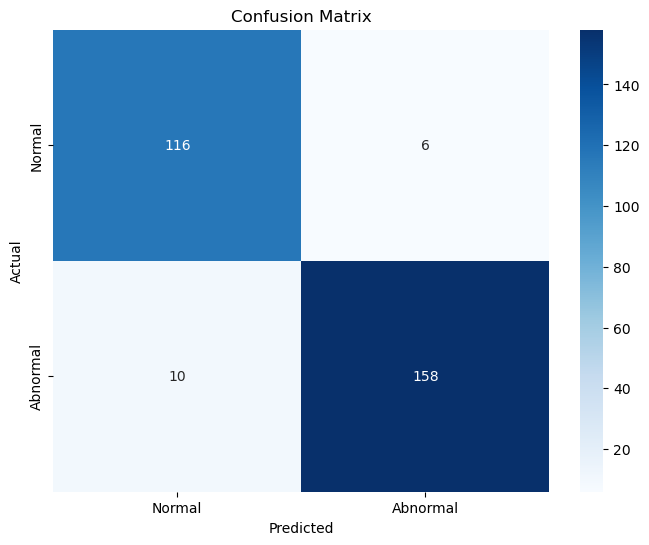

In [79]:
# Execution
if __name__ == '__main__':
    early_stopping = EarlyStopping(patience=5, min_delta=0.01)
    
    train_model(model_eff, train_loader, test_loader, criterion, optimizer, num_epochs=30, early_stopping=early_stopping)
    train_accuracy = evaluate_model(model_eff, train_loader)
    test_accuracy = evaluate_model(model_eff, test_loader)
    print(f'Training Accuracy: {train_accuracy:.2f}%')
    print(f'Testing Accuracy: {test_accuracy:.2f}%')
    
    model_path = "/Users/macintosh/Desktop/Cervical Cancer Classification/Models/model_eff.pth"
    torch.save(model_eff, model_path)
    
    all_labels, all_preds = get_predictions(model_eff, test_loader)
    f1 = f1_score(all_labels, all_preds, average='weighted')
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    cm = confusion_matrix(all_labels, all_preds)
    print(f'F1 Score: {f1:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Normal', 'Abnormal'],
                yticklabels=['Normal', 'Abnormal'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

### <center> **Wide ResNet50**

In [59]:
# Model Setup
model_wide_res = models.wide_resnet50_2(weights='DEFAULT')
num_ftrs = model_wide_res.fc.in_features
model_wide_res.fc = nn.Linear(num_ftrs, 2)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_wide_res = model_wide_res.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_wide_res.parameters(), lr=0.001)

In [60]:
# Early Stopping Class
class EarlyStopping:
    def __init__(self, patience=5, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        self.best_model_state = None

    def __call__(self, val_loss, model_wide_res):
        if self.best_loss is None:
            self.best_loss = val_loss
            self.best_model_state = copy.deepcopy(model_wide_res.state_dict())
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            print(f"EarlyStopping counter: {self.counter} of {self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.best_model_state = copy.deepcopy(model_wide_res.state_dict())
            self.counter = 0

In [61]:
# 3. Training Function
def train_model(model_wide_res, train_loader, val_loader, criterion, optimizer, num_epochs, early_stopping):
    
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)
    
    for epoch in range(num_epochs):
        model_wide_res.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model_wide_res(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        avg_train_loss = running_loss / len(train_loader)
        
        # Validation Phase
        model_wide_res.eval()
        val_loss = 0.0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model_wide_res(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

        avg_val_loss = val_loss / len(val_loader)
        
        print(f"Epoch [{epoch+1}/{num_epochs}], "
              f"Train Loss: {avg_train_loss:.4f}, "
              f"Validation Loss: {avg_val_loss:.4f}")

        scheduler.step()

        # Check for early stopping
        early_stopping(avg_val_loss, model_wide_res)
        if early_stopping.early_stop:
            print("Stopping early due to no improvement in validation loss.")
            # Load the best model state found so far
            model_wide_res.load_state_dict(early_stopping.best_model_state)
            break

In [ ]:
# Evaluation Function
def evaluate_model(model_wide_res, data_loader):
    model_wide_res.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model_wide_res(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
    accuracy = 100 * correct / total
    return accuracy

def get_predictions(model_wide_res, dataloader, device="cpu"):
    model_wide_res.eval()
    all_labels, all_preds = [], []
    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model_wide_res(images)
            _, preds = torch.max(outputs, 1)
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())
    return all_labels, all_preds

Epoch [1/30], Train Loss: 0.2219, Validation Loss: 0.2099
Epoch [2/30], Train Loss: 0.2051, Validation Loss: 0.2008
EarlyStopping counter: 1 of 5
Epoch [3/30], Train Loss: 0.1575, Validation Loss: 0.2891
EarlyStopping counter: 2 of 5
Epoch [4/30], Train Loss: 0.2556, Validation Loss: 0.2161
EarlyStopping counter: 3 of 5
Epoch [5/30], Train Loss: 0.1799, Validation Loss: 0.1914
Epoch [6/30], Train Loss: 0.2025, Validation Loss: 0.1667
Epoch [7/30], Train Loss: 0.1852, Validation Loss: 0.1782
EarlyStopping counter: 1 of 5
Epoch [8/30], Train Loss: 0.2006, Validation Loss: 0.1804
EarlyStopping counter: 2 of 5
Epoch [9/30], Train Loss: 0.2245, Validation Loss: 0.2055
EarlyStopping counter: 3 of 5
Epoch [10/30], Train Loss: 0.2234, Validation Loss: 0.1826
EarlyStopping counter: 4 of 5
Epoch [11/30], Train Loss: 0.2899, Validation Loss: 0.2135
EarlyStopping counter: 5 of 5
Stopping early due to no improvement in validation loss.
Training Accuracy: 92.90%
Testing Accuracy: 91.03%
F1 Score: 0.

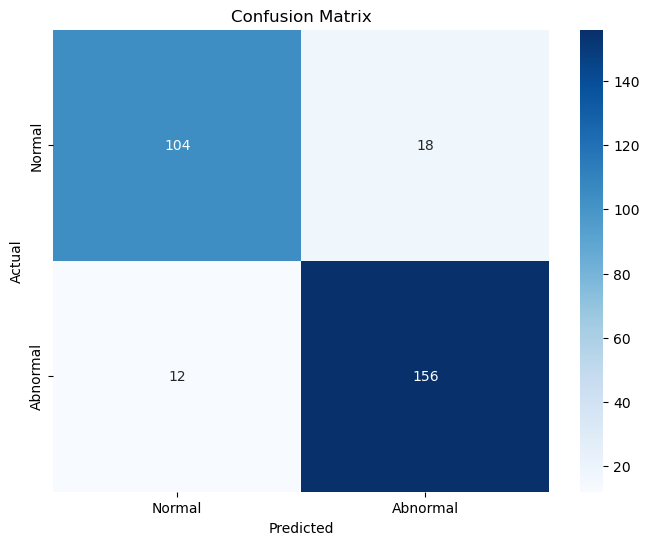

In [80]:
# Execution
if __name__ == '__main__':
    early_stopping = EarlyStopping(patience=5, min_delta=0.01)
    
    train_model(model_wide_res, train_loader, test_loader, criterion, optimizer, num_epochs=30, early_stopping=early_stopping)
    train_accuracy = evaluate_model(model_wide_res, train_loader)
    test_accuracy = evaluate_model(model_wide_res, test_loader)
    print(f'Training Accuracy: {train_accuracy:.2f}%')
    print(f'Testing Accuracy: {test_accuracy:.2f}%')
    
    model_path = "/Users/macintosh/Desktop/Cervical Cancer Classification/Models/model_wide_res.pth"
    torch.save(model_wide_res, model_path)
    
    all_labels, all_preds = get_predictions(model_wide_res, test_loader)
    f1 = f1_score(all_labels, all_preds, average='weighted')
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    cm = confusion_matrix(all_labels, all_preds)
    print(f'F1 Score: {f1:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Normal', 'Abnormal'],
                yticklabels=['Normal', 'Abnormal'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

In [ ]:
model = torch.load(model_path)

def predict(image_path):
    model.eval()
    image = Image.open(image_path).convert('RGB')
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    image = transform(image).unsqueeze(0).to(device)
    with torch.no_grad():
        output = model(image)
        _, predicted = torch.max(output.data, 1)
    return 'Normal' if predicted.item() == 0 else 'Abnormal'

image_path = '/Users/macintosh/Desktop/Cervical Cancer Classification/normal_cells/main_im_Superficial-Intermediate/001.bmp'
prediction = predict(image_path)
print(f'The cell in the image is predicted to be: {prediction}')